In [3]:
import getpass
import nibabel as nib
from matplotlib.pyplot import imsave
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [4]:
user = getpass.getuser()

nifti_dir = "/home/ORUNET/" + user + "/Private/Data/BWT/Nifti"
nifti_paths = list(Path(nifti_dir).glob('**/*.nii'))
seg_dir = "/home/ORUNET/" + user + "/Private/Data/BWT/Segmentations"
dst_dir = "/home/ORUNET/" + user + "/Private/Data/BWT/Preprocessed"

In [39]:
mask = nib.load(seg_dir + "/1001_bwt/mask_R.nii.gz").get_fdata()

In [40]:
start_z = 0

for z in range(mask.shape[2]):
    if mask[:,:,z].any():
        start_z = z
        break

stop_z = mask.shape[2]

for z in reversed(range(mask.shape[2])):
    if mask[:,:,z].any():
        stop_z = z
        break

print("start:", start_z, "stop:", stop_z)

start_x = 0

for x in range(mask.shape[0]):
    if mask[x,:,:].any():
        start_x = x
        break

stop_x = mask.shape[0]

for x in reversed(range(mask.shape[0])):
    if mask[x,:,:].any():
        stop_x = x
        break

print("start:", start_x, "stop:", stop_x)




start: 39 stop: 490
start: 36 stop: 271


In [46]:
nib_imgs = nib.load(nifti_paths[0]).get_fdata()
nib_imgs = nib_imgs[start_x:stop_x,50:-50, 200:201] 

low_cv, high_cv = -1024, 250

for i, im in enumerate(nib_imgs):
    if any(any(c > high_cv or c < low_cv for c in r) for r in im):
        nib_imgs[i] = [[max(min(c, high_cv), low_cv) for c in r] for r in im]

In [75]:
nib_imgs[5][250]

array([  -1.,   28.,   52.,  -27.,   22.,   87.,    0.,   33.,   84.,
         90.,   69.,   30.,   76.,   26.,    5.,   79.,  148.,   32.,
        -59.,  100.,   37.,  -54.,  129.,   22.,  185.,  250.,   87.,
         81.,  122.,  202.,  148.,   62.,   19.,   -6.,  128.,  250.,
        118.,   54.,   22.,    4.,   14.,  -39.,  -85.,  -48.,  -83.,
         60.,   59.,   61.,  120.,   13.,  -28.,   65.,   -3.,   -2.,
         19.,  -91.,  -74.,  -65., -185., -111.,  -87., -111., -131.,
       -106.,  -99., -183.,  -89., -129., -159., -136., -156.,  -47.,
         -8.,   60.,  -17., -120., -137.,  -75.,  -70.,  -13., -157.,
       -218., -156., -103.,   23.,  -67.,   23.,  -46.,  -39.,  -35.,
       -112.,  -69.,  -92., -119., -178., -181., -192., -146., -136.,
         -7.,  -90., -160., -148., -112., -107.,  -75.,  -85.,  -89.,
        -65.,  -55.,  -20.,   20.,  -43.,   48.,  -25.,  -58.,  -23.,
         22.,   29.,  -46.,  -28.,   65.,   33.,   81.,   82.,  -11.,
        -43.,    9.,

In [44]:
nib_imgs = nib.load(nifti_paths[2]).get_fdata() 
q, n = divmod(nib_imgs.shape[2],17)
print(q,n)

35 12


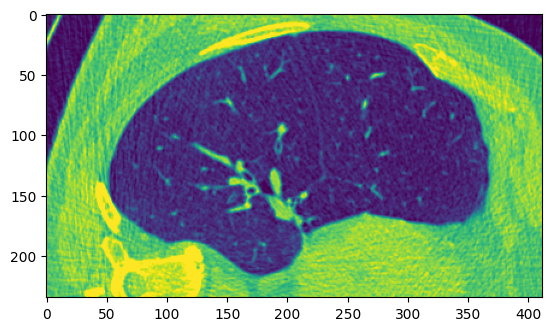

In [47]:
for i in range(0, nib_imgs.shape[2], 17):
    img = nib_imgs[:, :, i]
    #ctk_imgs.append(img)
plt.imshow(img)
#plt.imshow(ctk_imgs[7], cmap=cm.gray)
#imsave('name.png', ctk_imgs[20], cmap=cm.gray)